In [2]:
! pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached h5py-3

In [8]:
! pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
! pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.0 MB/s eta 0:00:001.6 MB/s eta 0:00:02
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.5 MB/s eta 0:00:0031m1.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = "/home/mahdi/logo_detection_model/Logo_dataset"

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalize pixel values to [0, 1]
    # rotation_range=20,          # Random rotation (in degrees)
    # width_shift_range=0.2,      # Horizontal shift
    # height_shift_range=0.2,     # Vertical shift
    # shear_range=0.2,            # Shear transformation
    # zoom_range=0.2,             # Zoom in/out
    # horizontal_flip=True,       # Random horizontal flip
    # fill_mode="nearest",        # Filling empty pixels after transformation
    validation_split=0.2        # Use 20% of data for validation
)

# Validation generator (no augmentation, just preprocessing)
val_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          # Normalize pixel values
    validation_split=0.2        # Use the same split as train_datagen
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),     # Resize images to 224x224
    batch_size=8,
    class_mode="binary",
    subset="training"
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=2,
    class_mode="binary",
    subset="validation"
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")


2025-01-18 14:20:33.210260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-18 14:20:33.210580: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 14:20:33.212260: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-18 14:20:33.217059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737197433.225538  152132 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737197433.22

Found 67 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Training samples: 67
Validation samples: 16


In [ ]:
for  batch,labels in train_generator:
    print(batch.shape, labels.shape)  # Verify batch dimensions
    print(labels)
    break


(8, 224, 224, 3) (8,)
[1. 0. 1. 1. 1. 0. 1. 0.]


In [ ]:
print(batch[0])

[[[0.8117648  0.8117648  0.8117648 ]
  [0.83921576 0.83921576 0.83921576]
  [0.8470589  0.8470589  0.8470589 ]
  ...
  [0.91372555 0.91372555 0.91372555]
  [0.92549026 0.92549026 0.92549026]
  [0.9450981  0.9450981  0.9450981 ]]

 [[0.8313726  0.8313726  0.8313726 ]
  [0.854902   0.854902   0.854902  ]
  [0.8470589  0.8470589  0.8470589 ]
  ...
  [0.9176471  0.9176471  0.9176471 ]
  [0.9333334  0.9333334  0.9333334 ]
  [0.95294124 0.95294124 0.95294124]]

 [[0.78823537 0.78823537 0.78823537]
  [0.81568635 0.81568635 0.81568635]
  [0.8235295  0.8235295  0.8235295 ]
  ...
  [0.89019614 0.89019614 0.89019614]
  [0.90196085 0.90196085 0.90196085]
  [0.9215687  0.9215687  0.9215687 ]]

 ...

 [[0.5411765  0.5411765  0.5411765 ]
  [0.57254905 0.57254905 0.57254905]
  [0.53333336 0.53333336 0.53333336]
  ...
  [0.7607844  0.7607844  0.7607844 ]
  [0.7607844  0.7607844  0.7607844 ]
  [0.78823537 0.78823537 0.78823537]]

 [[0.5529412  0.5529412  0.5529412 ]
  [0.58431375 0.58431375 0.58431375]


In [2]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow as tf
# import PIL

# Load pre-trained EfficientNet
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model initially

# Add custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)


W0000 00:00:1737197437.418993  152132 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10


/home/mahdi/logo_detection_model/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/home/mahdi/logo_detection_model/.venv/lib/python3.12/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.5073 - loss: 0.7296 - val_accuracy: 0.5625 - val_loss: 0.6868
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.6803

/home/mahdi/logo_detection_model/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5000 - loss: 0.6803 - val_accuracy: 0.5625 - val_loss: 0.6857
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.4699 - loss: 0.7077 - val_accuracy: 0.5625 - val_loss: 0.6858
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6250 - loss: 0.7076 - val_accuracy: 0.5625 - val_loss: 0.6851
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.4770 - loss: 0.7236 - val_accuracy: 0.5625 - val_loss: 0.6894
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6667 - loss: 0.6892 - val_accuracy: 0.5625 - val_loss: 0.6898
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.5056 - loss: 0.7413 - val_accuracy: 0.5625 - val_loss: 0.6855
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5000 - loss: 0.6637 - val_accuracy: 0.5625 - val_loss: 0.6855
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.6307 - loss: 0.6770 - val_accuracy: 0.5625 - val_loss: 0.6853
Epoch 1

In [3]:
# Save the fine-tuned model
model.save("/home/mahdi/logo_detection_model/trained_model/efficientnet_finetuned_binary.h5")

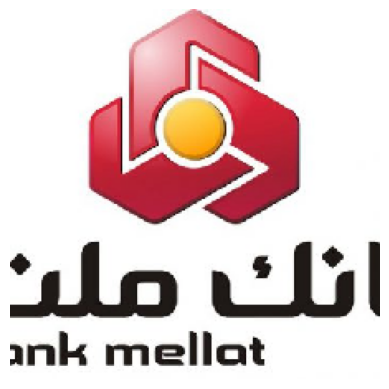

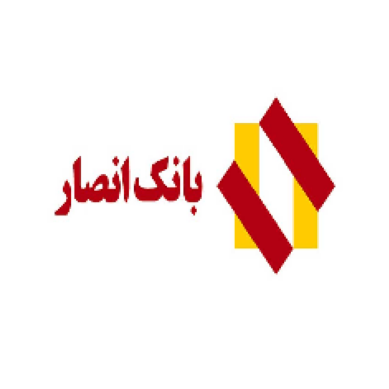

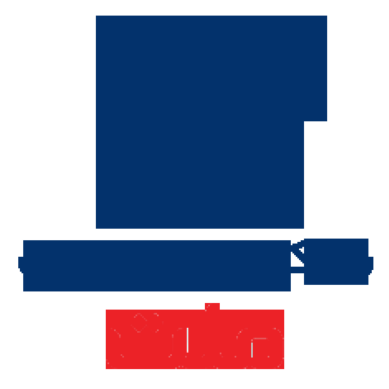

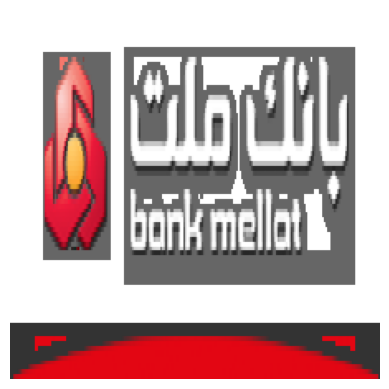

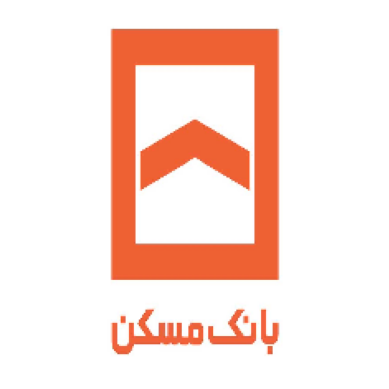

In [6]:
import matplotlib.pyplot as plt

# Plot augmented images safely
augmented_images, _ = next(train_generator)

# Get the actual number of images in the batch
num_images = augmented_images.shape[0]

for i in range(min(5, num_images)):  # Plot up to 5 images or as many as available
    plt.imshow(augmented_images[i])
    plt.axis('off')
    plt.show()


In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the fine-tuned model
# model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Logo_similarity/efficientnet_finetuned_binary.h5")
model = tf.keras.models.load_model("/home/mahdi/logo_detection_model/trained_model/efficientnet_finetuned_binary.h5")
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Bank Mellat Logo", prediction[0][0]
    else:
        return "Not Logo", prediction[0][0]

# Example usage
image_path = "/home/mahdi/logo_detection_model/test_images/291_13.jpg"
result, confidence = predict_image(image_path, model)
print(f"Result: {result}, Confidence: {confidence:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
Result: Not Logo, Confidence: 0.4772
